# ReEDS Scenarios on PV ICE Tool USA

To explore different scenarios for furture installation projections of PV (or any technology), ReEDS output data can be useful in providing standard scenarios. ReEDS installation projections are used in this journal as input data to the PV ICE tool. 

Current sections include:

<ol>
    <li> ### Reading a standard ReEDS output file and saving it in a PV ICE input format </li>
<li>### Reading scenarios of interest and running PV ICE tool </li>
<li>###Plotting </li>
<li>### GeoPlotting.</li>
</ol>
    Notes:
   
Scenarios of Interest:
	the Ref.Mod, 
o	95-by-35.Adv, and 
o	95-by-35+Elec.Adv+DR ones


In [2]:
import PV_ICE
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
from IPython.display import display
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent.parent / 'PV_ICE' / 'TEMP' / 'Solar_Futures')
inputfolder = str(Path().resolve().parent.parent.parent / 'PV_ICE' / 'TEMP')
print ("Your simulation will be stored in %s" % testfolder)


Your simulation will be stored in C:\Users\Silvana\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\Solar_Futures


In [4]:
if not os.path.exists(testfolder):
    os.makedirs(testfolder)

In [5]:
PV_ICE.__version__

'v0.2.0+70.gf533800.dirty'

### Create Scenarios in PV_ICE

#### Rename difficult characters from Scenarios Names

In [6]:
scenarios = ['Reference.Mod',
 'Reference.Adv',
 'Reference.Adv_DR',
 '95-by-35.Mod',
 '95-by-35.Adv',
 '95-by-35.Adv_DR',
 '95-by-35_Elec.Mod',
 '95-by-35_Elec.Adv',
 '95-by-35_Elec.Adv_DR']

#### Downselect to Solar Future scenarios of interest

Scenarios of Interest:
<li> Ref.Mod
<li> 95-by-35.Adv  
<li> 95-by-35+Elec.Adv+DR 

In [7]:
#SFscenarios = [simulationname[0], simulationname[4], simulationname[8]]
SFscenarios = ['Reference.Mod', '95-by-35.Adv', '95-by-35_Elec.Adv_DR']
SFscenarios

['Reference.Mod', '95-by-35.Adv', '95-by-35_Elec.Adv_DR']

#### Create the 3 Scenarios and assign Baselines

Keeping track of each scenario as its own PV ICE Object.

In [8]:
MATERIALS = ['glass', 'silicon', 'silver','copper','aluminium','backsheet','encapsulant']

In [9]:
i = 0
rr = PV_ICE.Simulation(name='USA', path=testfolder)
for i in range(0, 3):
    filetitle = SFscenarios[i]+'.csv'
    filetitle = os.path.join(inputfolder, 'USA', filetitle)    
    rr.createScenario(name=SFscenarios[i], file=filetitle)
    rr.scenario[SFscenarios[i]].addMaterials(MATERIALS, baselinefolder=r'..\..\baselines\SolarFutures_2021', nameformat=r'\baseline_material_{}_Reeds.csv')


path = C:\Users\Silvana\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\Solar_Futures


In [10]:
PERFECTMFG = False
IRENA = False
ELorRL = 'EL'

if PERFECTMFG:
    rr.scenMod_PerfectManufacturing()
    rr.scenMod_noCircularity()
    
if IRENA:
    rr.scenMod_IRENIFY(ELorRL=ELorRL)
    title_Method = 'Irena_'+ELorRL
else:
    title_Method = 'PVICE'

In [11]:
rr.calculateMassFlow()

Working on Scenario:  Reference.Mod
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium
==> Working on Material :  backsheet
==> Working on Material :  encapsulant
Working on Scenario:  95-by-35.Adv
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium
==> Working on Material :  backsheet
==> Working on Material :  encapsulant
Working on Scenario:  95-by-35_Elec.Adv_DR
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium
==> Working on Mater

In [12]:
"""
print("Scenarios:", rr.scenario.keys())
print("Module Keys:", rr.scenario[SFscenarios[0]].data.keys())
print("Material Keys: ", rr.scenario[SFscenarios[0]].material['glass'].materialdata.keys())
rr.plotScenariosComparison(keyword='Cumulative_Area_disposedby_Failure')
rr.plotMaterialComparisonAcrossScenarios(material='silicon', keyword='mat_Total_Landfilled')
"""
pass

## Aggregating PCAs Material Landfilled to obtain US totals by Year

In [13]:
USyearly, UScum = rr.aggregateResults()

In [14]:
# Data for Jarett
USyearly.to_csv(title_Method+' US_Yearly NATION_tonnes.csv')
UScum.to_csv(title_Method+' US_Cumulative NATION_tonnes.csv')


#### 3 sig figures save Yearly and cumulative overview Nation

In [15]:
'''
USyearly3sig = USyearly.copy()
UScum3sig = UScum.copy()
N = 2

UScum3sig = UScum3sig.drop(UScum3sig.index[0])
USyearly3sig = USyearly3sig.drop(USyearly3sig.index[0])

if IRENA:
    UScum3sig = UScum3sig.loc[:, ~UScum3sig.columns.str.startswith('Waste_MFG_')]
    USyearly3sig = USyearly3sig.loc[:, ~USyearly3sig.columns.str.startswith('Waste_MFG_')]

USyearly3sig = USyearly3sig.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
USyearly3sig = USyearly3sig.applymap(lambda x: int(x))

UScum3sig = UScum3sig.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
UScum3sig = UScum3sig.applymap(lambda x: int(x))

USyearly3sig.to_csv(title_Method+' US_Yearly NATION_3sigs.csv')
UScum3sig.to_csv(title_Method+' US_Cumulative NATION_3sigs.csv')
''';

In [16]:
obj = SFscenarios[-1]
mat = MATERIALS[-1]

In [17]:
print("Sanity check: mat_Total_Landfilled = mat_Total_EOL_Landfilled + mat_Total_MFG_Landfilled")
A = rr.scenario[obj].material[mat].materialdata['mat_Total_Landfilled'].iloc[5]
B = rr.scenario[obj].material[mat].materialdata['mat_Total_EOL_Landfilled'].iloc[5]
C = rr.scenario[obj].material[mat].materialdata['mat_Total_MFG_Landfilled'].iloc[5]
A - B - C

Sanity check: mat_Total_Landfilled = mat_Total_EOL_Landfilled + mat_Total_MFG_Landfilled


0.0

# PLOT

## Yearly Virgin Material Needs by Scenario

In [18]:
USyearly.keys()

Index(['VirginStock_glass_USA_Reference.Mod_[Tonnes]',
       'VirginStock_silicon_USA_Reference.Mod_[Tonnes]',
       'VirginStock_silver_USA_Reference.Mod_[Tonnes]',
       'VirginStock_copper_USA_Reference.Mod_[Tonnes]',
       'VirginStock_aluminium_USA_Reference.Mod_[Tonnes]',
       'VirginStock_backsheet_USA_Reference.Mod_[Tonnes]',
       'VirginStock_encapsulant_USA_Reference.Mod_[Tonnes]',
       'VirginStock_Module_USA_Reference.Mod_[Tonnes]',
       'WasteAll_glass_USA_Reference.Mod_[Tonnes]',
       'WasteAll_silicon_USA_Reference.Mod_[Tonnes]',
       ...
       'WasteMFG_aluminium_USA_95-by-35_Elec.Adv_DR_[Tonnes]',
       'WasteMFG_backsheet_USA_95-by-35_Elec.Adv_DR_[Tonnes]',
       'WasteMFG_encapsulant_USA_95-by-35_Elec.Adv_DR_[Tonnes]',
       'WasteMFG_Module_USA_95-by-35_Elec.Adv_DR_[Tonnes]',
       'newInstalledCapacity_USA_Reference.Mod_[MW]',
       'newInstalledCapacity_USA_95-by-35.Adv_[MW]',
       'newInstalledCapacity_USA_95-by-35_Elec.Adv_DR_[MW]',
     

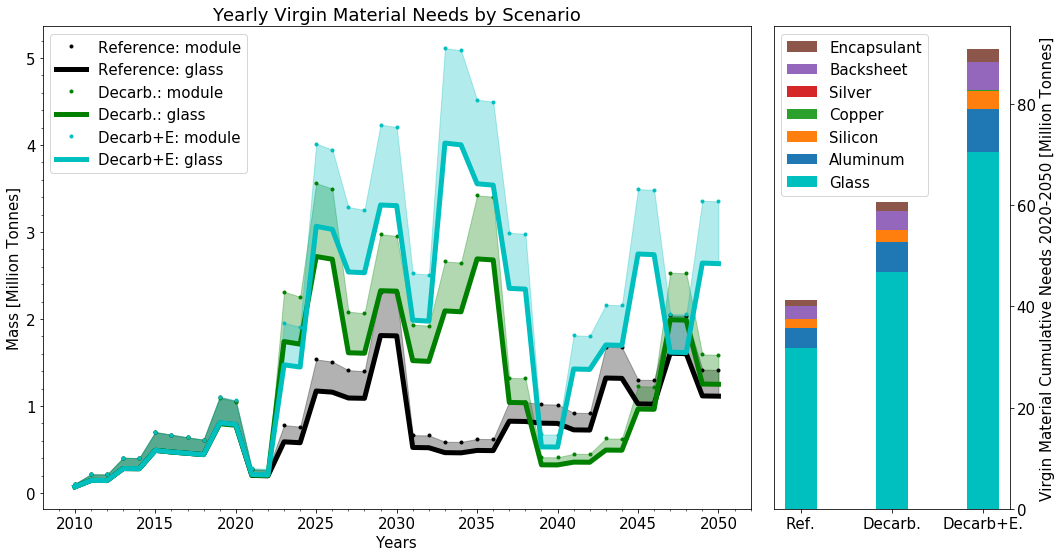

In [19]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='VirginStock_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})

########################    
# SUBPLOT 1
########################
#######################

foo = pd.DataFrame() 
    
# Loop over Keywords
ii = 0 
# Loop over SF Scenarios

# SCENARIO 1 ***************
kk = 0
obj = SFscenarios[kk]
matindex = np.array(rr.scenario[obj].data['year'].tolist())
modulemat = np.array(USyearly[keyw+'Module_USA_'+obj+'_[Tonnes]']/1e6)
glassmat = np.array(USyearly[keyw+'glass_USA_'+obj+'_[Tonnes]']/1e6)
a0.plot(matindex, modulemat, 'k.', linewidth=5, label='Reference: module')
a0.plot(matindex, glassmat, 'k', linewidth=5, label='Reference: glass')
a0.fill_between(matindex, glassmat, modulemat, color='k', alpha=0.3, interpolate=True)

# SCENARIO 2 ***************
kk = 1
obj = SFscenarios[kk]
modulemat = np.array(USyearly[keyw+'Module_USA_'+obj+'_[Tonnes]']/1e6)
glassmat = np.array(USyearly[keyw+'glass_USA_'+obj+'_[Tonnes]']/1e6)
a0.plot(matindex, modulemat, 'g.', linewidth=5, label='Decarb.: module')
a0.plot(matindex, glassmat, 'g', linewidth=5, label='Decarb.: glass')
a0.fill_between(matindex, glassmat, modulemat, color='g', alpha=0.3, interpolate=True)

# SCENARIO 3 ***************
kk = 2
obj = SFscenarios[kk]
modulemat = np.array(USyearly[keyw+'Module_USA_'+obj+'_[Tonnes]']/1e6)
glassmat = np.array(USyearly[keyw+'glass_USA_'+obj+'_[Tonnes]']/1e6)
a0.plot(matindex, modulemat, 'c.', linewidth=5, label='Decarb+E: module')
a0.plot(matindex, glassmat, 'c', linewidth=5, label='Decarb+E: glass')
a0.fill_between(matindex, glassmat, modulemat, color='c', alpha=0.3, interpolate=True)

a0.legend(loc='upper left')
a0.set_title('Yearly Virgin Material Needs by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlabel('Years')
a0.minorticks_on()


########################    
# SUBPLOT 2
########################
#######################
# Calculate    
materials = ['glass', 'aluminium', 'silicon', 'copper', 'silver', 'encapsulant', 'backsheet']

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    for kk in range (0, 3):
        obj = SFscenarios[kk]
        matcum.append(UScum[keyw+materials[ii]+'_USA_'+obj+'_[Tonnes]'].loc[2050])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']
dfcumulations2050['bottom5'] = dfcumulations2050['bottom4']+dfcumulations2050['silver']
dfcumulations2050['bottom6'] = dfcumulations2050['bottom5']+dfcumulations2050['encapsulant']


## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])
p5 = a1.bar(ind, dfcumulations2050['encapsulant'], width,
             bottom=dfcumulations2050['bottom5'])
p6 = a1.bar(ind, dfcumulations2050['backsheet'], width,
             bottom=dfcumulations2050['bottom6'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.set_ylabel('Virgin Material Cumulative Needs 2020-2050 [Million Tonnes]')

plt.sca(a1)
plt.xticks(range(3), ['Ref.', 'Decarb.', 'Decarb+E.'], color='black', rotation=0)
plt.tick_params(axis='y', which='minor', bottom=False)
a1.legend((p6[0], p5[0], p4[0], p3[0], p2[0], p1[0], p0[0] ), ('Encapsulant','Backsheet','Silver', 'Copper', 'Silicon','Aluminum','Glass'))

f.tight_layout()
f.savefig(title_Method+' SF Figure 3 - Yearly Virgin Material Needs by Scenario and Cumulatives.png', dpi=600)
plt.show()

In [20]:
rr.scenario['Reference.Mod'].material['glass'].materialdata['mat_Virgin_Stock'].tail(5)

36    1.021035e+12
37    1.605191e+12
38    1.601007e+12
39    1.115273e+12
40    1.112549e+12
Name: mat_Virgin_Stock, dtype: float64

# Save Data for Jarett Zuboy

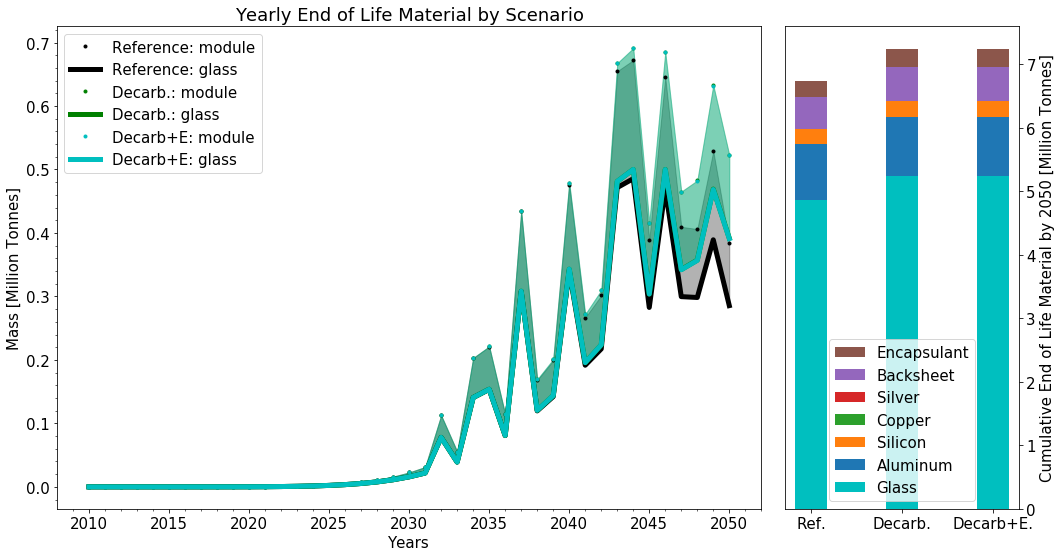

In [21]:
# Figur 19
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='WasteEOL_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})

########################    
# SUBPLOT 1
########################
#######################

foo = pd.DataFrame() 
    
# Loop over Keywords
ii = 0 
# Loop over SF Scenarios

# SCENARIO 1 ***************
kk = 0
obj = SFscenarios[kk]
matindex = np.array(rr.scenario[obj].data['year'].tolist())
modulemat = np.array(USyearly[keyw+'Module_USA_'+obj+'_[Tonnes]']/1e6)
glassmat = np.array(USyearly[keyw+'glass_USA_'+obj+'_[Tonnes]']/1e6)
a0.plot(matindex, modulemat, 'k.', linewidth=5, label='Reference: module')
a0.plot(matindex, glassmat, 'k', linewidth=5, label='Reference: glass')
a0.fill_between(matindex, glassmat, modulemat, color='k', alpha=0.3, interpolate=True)

# SCENARIO 2 ***************
kk = 1
obj = SFscenarios[kk]
modulemat = np.array(USyearly[keyw+'Module_USA_'+obj+'_[Tonnes]']/1e6)
glassmat = np.array(USyearly[keyw+'glass_USA_'+obj+'_[Tonnes]']/1e6)
a0.plot(matindex, modulemat, 'g.', linewidth=5, label='Decarb.: module')
a0.plot(matindex, glassmat, 'g', linewidth=5, label='Decarb.: glass')
a0.fill_between(matindex, glassmat, modulemat, color='g', alpha=0.3, interpolate=True)

# SCENARIO 3 ***************
kk = 2
obj = SFscenarios[kk]
modulemat = np.array(USyearly[keyw+'Module_USA_'+obj+'_[Tonnes]']/1e6)
glassmat = np.array(USyearly[keyw+'glass_USA_'+obj+'_[Tonnes]']/1e6)
a0.plot(matindex, modulemat, 'c.', linewidth=5, label='Decarb+E: module')
a0.plot(matindex, glassmat, 'c', linewidth=5, label='Decarb+E: glass')
a0.fill_between(matindex, glassmat, modulemat, color='c', alpha=0.3, interpolate=True)

a0.legend(loc='upper left')
a0.set_title('Yearly End of Life Material by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlabel('Years')
a0.minorticks_on()


########################    
# SUBPLOT 2
########################
#######################
# Calculate    
materials = ['glass', 'aluminium', 'silicon', 'copper', 'silver', 'encapsulant', 'backsheet']

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    for kk in range (0, 3):
        obj = SFscenarios[kk]
        matcum.append(UScum[keyw+materials[ii]+'_USA_'+obj+'_[Tonnes]'].loc[2050])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']
dfcumulations2050['bottom5'] = dfcumulations2050['bottom4']+dfcumulations2050['silver']
dfcumulations2050['bottom6'] = dfcumulations2050['bottom5']+dfcumulations2050['encapsulant']


## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])
p5 = a1.bar(ind, dfcumulations2050['encapsulant'], width,
             bottom=dfcumulations2050['bottom5'])
p6 = a1.bar(ind, dfcumulations2050['backsheet'], width,
             bottom=dfcumulations2050['bottom6'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.set_ylabel('Cumulative End of Life Material by 2050 [Million Tonnes]')

plt.sca(a1)
plt.xticks(range(3), ['Ref.', 'Decarb.', 'Decarb+E.'], color='black', rotation=0)
plt.tick_params(axis='y', which='minor', bottom=False)
a1.legend((p6[0], p5[0], p4[0], p3[0], p2[0], p1[0], p0[0] ), ('Encapsulant','Backsheet','Silver', 'Copper', 'Silicon','Aluminum','Glass'))

f.tight_layout()
f.savefig(title_Method+' SF Figure 17 - Yearly EoL Waste by Scenario and Cumulatives_Nation.png', dpi=600)
plt.show()

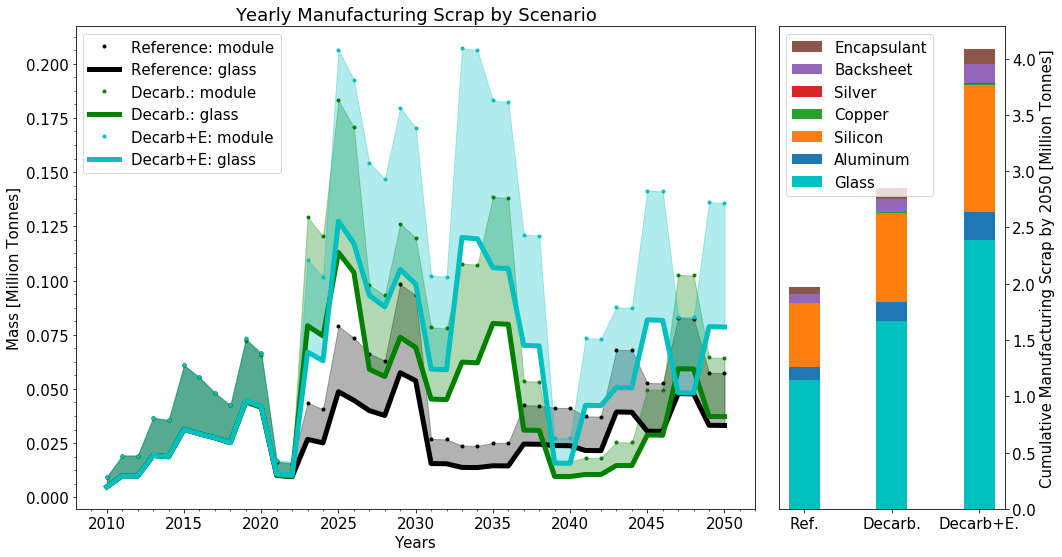

In [22]:
# Figur 19
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='WasteMFG_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})

########################    
# SUBPLOT 1
########################
#######################

foo = pd.DataFrame() 
    
# Loop over Keywords
ii = 0 
# Loop over SF Scenarios

# SCENARIO 1 ***************
kk = 0
obj = SFscenarios[kk]
matindex = np.array(rr.scenario[obj].data['year'].tolist())
modulemat = np.array(USyearly[keyw+'Module_USA_'+obj+'_[Tonnes]']/1e6)
glassmat = np.array(USyearly[keyw+'glass_USA_'+obj+'_[Tonnes]']/1e6)
a0.plot(matindex, modulemat, 'k.', linewidth=5, label='Reference: module')
a0.plot(matindex, glassmat, 'k', linewidth=5, label='Reference: glass')
a0.fill_between(matindex, glassmat, modulemat, color='k', alpha=0.3, interpolate=True)

# SCENARIO 2 ***************
kk = 1
obj = SFscenarios[kk]
modulemat = np.array(USyearly[keyw+'Module_USA_'+obj+'_[Tonnes]']/1e6)
glassmat = np.array(USyearly[keyw+'glass_USA_'+obj+'_[Tonnes]']/1e6)
a0.plot(matindex, modulemat, 'g.', linewidth=5, label='Decarb.: module')
a0.plot(matindex, glassmat, 'g', linewidth=5, label='Decarb.: glass')
a0.fill_between(matindex, glassmat, modulemat, color='g', alpha=0.3, interpolate=True)

# SCENARIO 3 ***************
kk = 2
obj = SFscenarios[kk]
modulemat = np.array(USyearly[keyw+'Module_USA_'+obj+'_[Tonnes]']/1e6)
glassmat = np.array(USyearly[keyw+'glass_USA_'+obj+'_[Tonnes]']/1e6)
a0.plot(matindex, modulemat, 'c.', linewidth=5, label='Decarb+E: module')
a0.plot(matindex, glassmat, 'c', linewidth=5, label='Decarb+E: glass')
a0.fill_between(matindex, glassmat, modulemat, color='c', alpha=0.3, interpolate=True)

a0.legend(loc='upper left')
a0.set_title('Yearly Manufacturing Scrap by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlabel('Years')
a0.minorticks_on()


########################    
# SUBPLOT 2
########################
#######################
# Calculate    
materials = ['glass', 'aluminium', 'silicon', 'copper', 'silver', 'encapsulant', 'backsheet']

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    for kk in range (0, 3):
        obj = SFscenarios[kk]
        matcum.append(UScum[keyw+materials[ii]+'_USA_'+obj+'_[Tonnes]'].loc[2050])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']
dfcumulations2050['bottom5'] = dfcumulations2050['bottom4']+dfcumulations2050['silver']
dfcumulations2050['bottom6'] = dfcumulations2050['bottom5']+dfcumulations2050['encapsulant']


## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])
p5 = a1.bar(ind, dfcumulations2050['encapsulant'], width,
             bottom=dfcumulations2050['bottom5'])
p6 = a1.bar(ind, dfcumulations2050['backsheet'], width,
             bottom=dfcumulations2050['bottom6'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.set_ylabel('Cumulative Manufacturing Scrap by 2050 [Million Tonnes]')

plt.sca(a1)
plt.xticks(range(3), ['Ref.', 'Decarb.', 'Decarb+E.'], color='black', rotation=0)
plt.tick_params(axis='y', which='minor', bottom=False)
a1.legend((p6[0], p5[0], p4[0], p3[0], p2[0], p1[0], p0[0] ), ('Encapsulant','Backsheet','Silver', 'Copper', 'Silicon','Aluminum','Glass'))

f.tight_layout()
f.savefig(title_Method+' SF Figure 18 - Yearly MFG Waste by Scenario and Cumulatives_Nation.png', dpi=600)

plt.show()

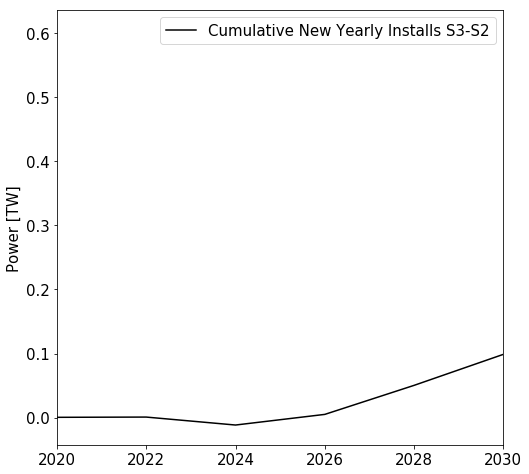

In [24]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (8, 8)

fig, axs = plt.subplots(figsize=(8, 8))
axs.plot(UScum['newInstalledCapacity_USA_'+SFscenarios[2]+'_[MW]']/1e6-UScum['newInstalledCapacity_USA_'+SFscenarios[1]+'_[MW]']/1e6, 'k', label='Cumulative New Yearly Installs S3-S2')

#axs.plot(UScum['new_Installed_Capacity_[MW]'+SFscenarios[2]]/1e6, 'c', label='Cumulative New Yearly Installs')

axs.legend()
axs.set_xlim([2020,2030])
axs.set_ylabel('Power [TW]')
fig.savefig(title_Method+' Fig_New_Installs_vs_InstalledCapacity_vs_Waste', dpi=600)
plt.show()

# WASTE COMPARISON SIZE

In [31]:
UScum.keys()

Index(['VirginStock_glass_USA_Reference.Mod_[Tonnes]',
       'VirginStock_silicon_USA_Reference.Mod_[Tonnes]',
       'VirginStock_silver_USA_Reference.Mod_[Tonnes]',
       'VirginStock_copper_USA_Reference.Mod_[Tonnes]',
       'VirginStock_aluminium_USA_Reference.Mod_[Tonnes]',
       'VirginStock_backsheet_USA_Reference.Mod_[Tonnes]',
       'VirginStock_encapsulant_USA_Reference.Mod_[Tonnes]',
       'VirginStock_Module_USA_Reference.Mod_[Tonnes]',
       'WasteAll_glass_USA_Reference.Mod_[Tonnes]',
       'WasteAll_silicon_USA_Reference.Mod_[Tonnes]',
       'WasteAll_silver_USA_Reference.Mod_[Tonnes]',
       'WasteAll_copper_USA_Reference.Mod_[Tonnes]',
       'WasteAll_aluminium_USA_Reference.Mod_[Tonnes]',
       'WasteAll_backsheet_USA_Reference.Mod_[Tonnes]',
       'WasteAll_encapsulant_USA_Reference.Mod_[Tonnes]',
       'WasteAll_Module_USA_Reference.Mod_[Tonnes]',
       'WasteEOL_glass_USA_Reference.Mod_[Tonnes]',
       'WasteEOL_silicon_USA_Reference.Mod_[Tonnes]',


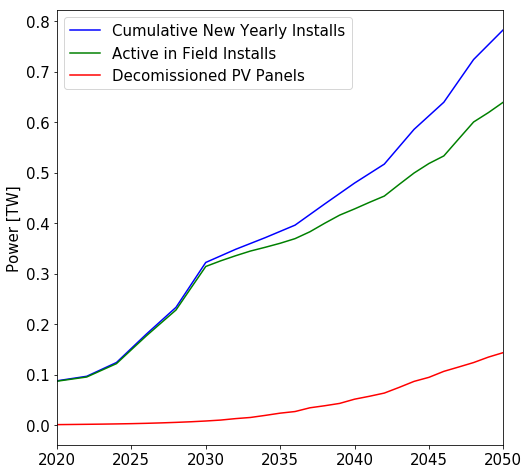

In [39]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (8, 8)

fig, axs = plt.subplots(figsize=(8, 8))
axs.plot(UScum['newInstalledCapacity_USA_'+SFscenarios[0]+'_[MW]']/1e6, 'b', label='Cumulative New Yearly Installs')
axs.plot(USyearly['Capacity_USA_'+SFscenarios[0]+'_[MW]']/1e6, 'g', label='Active in Field Installs')
axs.plot(UScum['newInstalledCapacity_USA_'+SFscenarios[0]+'_[MW]']/1e6-
         USyearly['Capacity_USA_'+SFscenarios[0]+'_[MW]']/1e6, 'r', label='Decomissioned PV Panels')
axs.legend()
axs.set_xlim([2020,2050])
axs.set_ylabel('Power [TW]')
fig.savefig(title_Method+' Fig_New_Installs_vs_InstalledCapacity_vs_Waste', dpi=600)
plt.show()

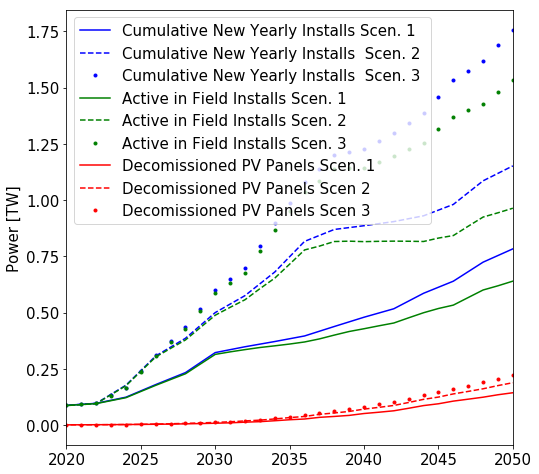

In [41]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (8, 8)

fig, axs = plt.subplots(figsize=(8, 8))
axs.plot(UScum['newInstalledCapacity_USA_'+SFscenarios[0]+'_[MW]']/1e6, 'b', label='Cumulative New Yearly Installs Scen. 1 ')
axs.plot(UScum['newInstalledCapacity_USA_'+SFscenarios[1]+'_[MW]']/1e6, 'b--', label='Cumulative New Yearly Installs  Scen. 2 ')
axs.plot(UScum['newInstalledCapacity_USA_'+SFscenarios[2]+'_[MW]']/1e6, 'b.', label='Cumulative New Yearly Installs  Scen. 3 ')
axs.plot(USyearly['Capacity_USA_'+SFscenarios[0]+'_[MW]']/1e6, 'g', label='Active in Field Installs Scen. 1')
axs.plot(USyearly['Capacity_USA_'+SFscenarios[1]+'_[MW]']/1e6, 'g--', label='Active in Field Installs Scen. 2')
axs.plot(USyearly['Capacity_USA_'+SFscenarios[2]+'_[MW]']/1e6, 'g.', label='Active in Field Installs Scen. 3')
axs.plot(UScum['newInstalledCapacity_USA_'+SFscenarios[0]+'_[MW]']/1e6-USyearly['Capacity_USA_'+SFscenarios[0]+'_[MW]']/1e6, 'r', label='Decomissioned PV Panels Scen. 1')
axs.plot(UScum['newInstalledCapacity_USA_'+SFscenarios[1]+'_[MW]']/1e6-USyearly['Capacity_USA_'+SFscenarios[1]+'_[MW]']/1e6, 'r--', label='Decomissioned PV Panels Scen 2')
axs.plot(UScum['newInstalledCapacity_USA_'+SFscenarios[2]+'_[MW]']/1e6-USyearly['Capacity_USA_'+SFscenarios[2]+'_[MW]']/1e6, 'r.', label='Decomissioned PV Panels Scen 3')

axs.legend()
axs.set_xlim([2020,2050])
axs.set_ylabel('Power [TW]')
plt.show()

In [43]:
foo0 = (UScum['newInstalledCapacity_USA_'+SFscenarios[0]+'_[MW]']/1e6-USyearly['Capacity_USA_'+SFscenarios[0]+'_[MW]']/1e6).sum()
foo1 = (UScum['newInstalledCapacity_USA_'+SFscenarios[1]+'_[MW]']/1e6-USyearly['Capacity_USA_'+SFscenarios[1]+'_[MW]']/1e6).sum()
foo2 = (UScum['newInstalledCapacity_USA_'+SFscenarios[2]+'_[MW]']/1e6-USyearly['Capacity_USA_'+SFscenarios[2]+'_[MW]']/1e6).sum()
print(foo0, foo1, foo2)

1.31125013036803 1.7524564581196613 2.0343250930748704


In [44]:
E = (UScum['newInstalledCapacity_USA_Reference.Mod_[MW]']/1e6).sum()
F = (UScum['newInstalledCapacity_USA_Reference.Mod_[MW]']/1e6-USyearly['Capacity_USA_Reference.Mod_[MW]']/1e12).sum()
print("Cumulative Installs", E)
print("Cumulative Waste", F)
print("Fraction of Decomisioned to Installed Cumulative by 2050", F/E)


Cumulative Installs 12.481579419861927
Cumulative Waste 12.481568249532636
Fraction of Decomisioned to Installed Cumulative by 2050 0.999999105054824


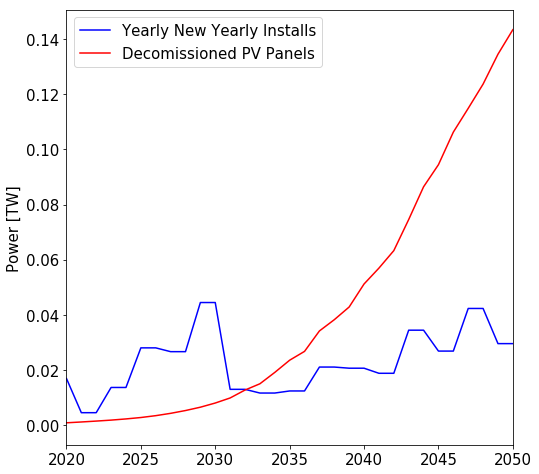

In [46]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (8, 8)

fig, axs = plt.subplots(figsize=(8, 8))
axs.plot(USyearly['newInstalledCapacity_USA_'+SFscenarios[0]+'_[MW]']/1e6, 'b', label='Yearly New Yearly Installs')
axs.plot(UScum['newInstalledCapacity_USA_'+SFscenarios[0]+'_[MW]']/1e6-USyearly['Capacity_USA_'+SFscenarios[0]+'_[MW]']/1e6, 'r', label='Decomissioned PV Panels')
axs.legend()
axs.set_xlim([2020,2050])
axs.set_ylabel('Power [TW]')
fig.savefig(title_Method+' Fig_New_Installs_vs_Decomisions', dpi=600)
plt.show()

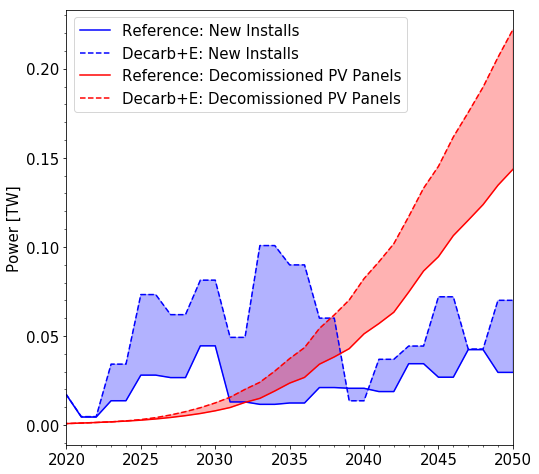

In [52]:
### SOLAR FUTURES FIGURE 20

plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (8, 8)

fig, axs = plt.subplots(figsize=(8, 8))
axs.plot(USyearly['newInstalledCapacity_USA_'+SFscenarios[0]+'_[MW]']/1e6, 'b', label='Reference: New Installs')
#axs.plot(USyearly['new_Installed_Capacity_[MW]'+SFscenarios[1]]/1e6, 'b', label='Grid Decarb.: Yearly New Yearly Installs')
axs.plot(USyearly['newInstalledCapacity_USA_'+SFscenarios[2]+'_[MW]']/1e6, 'b--', label='Decarb+E: New Installs')
axs.fill_between(rr.scenario[obj].data['year'], USyearly['newInstalledCapacity_USA_'+SFscenarios[0]+'_[MW]']/1e6,
                 USyearly['newInstalledCapacity_USA_'+SFscenarios[2]+'_[MW]']/1e6, color='b', alpha=0.3,
                 interpolate=True)


axs.plot(UScum['newInstalledCapacity_USA_'+SFscenarios[0]+'_[MW]']/1e6-USyearly['Capacity_USA_'+SFscenarios[0]+'_[MW]']/1e6, 'r', label='Reference: Decomissioned PV Panels')
axs.plot(UScum['newInstalledCapacity_USA_'+SFscenarios[2]+'_[MW]']/1e6-USyearly['Capacity_USA_'+SFscenarios[2]+'_[MW]']/1e6, 'r--', label='Decarb+E: Decomissioned PV Panels')
axs.fill_between(rr.scenario[obj].data['year'], UScum['newInstalledCapacity_USA_'+SFscenarios[0]+'_[MW]']/1e6-
                 USyearly['Capacity_USA_'+SFscenarios[0]+'_[MW]']/1e6,
                UScum['newInstalledCapacity_USA_'+SFscenarios[2]+'_[MW]']/1e6-USyearly['Capacity_USA_'+SFscenarios[2]+'_[MW]']/1e6, color='r', alpha=0.3,
                 interpolate=True)
axs.minorticks_on()


axs.legend()
axs.set_xlim([2020,2050])
axs.set_ylabel('Power [TW]')
fig.savefig(title_Method+' SF Figure 20 - New Installs vs Decomisions', dpi=600)
plt.show()

In [57]:
print("CUMULATIVE WASTE by 2050")
print("*************************")
print("")
UScum.iloc[-1]
print("MFG Scrap + EoL Material Only")
print("\t Reference Scenario: ", UScum['WasteAll_Module_USA_Reference.Mod_[Tonnes]'].iloc[-1]/1e6, ' Million Tonnes')
print("\t Grid Decarbonization Scenario: ", UScum['WasteAll_Module_USA_95-by-35.Adv_[Tonnes]'].iloc[-1]/1e6, ' Million Tonnes')
print("\t High Electrification Scenario: ", UScum['WasteAll_Module_USA_95-by-35_Elec.Adv_DR_[Tonnes]'].iloc[-1]/1e6, ' Million Tonnes')

print("EoL Material Only")
print("\t Reference Scenario: ", UScum['WasteEOL_Module_USA_Reference.Mod_[Tonnes]'].iloc[-1]/1e6, ' Million Tonnes')
print("\t Grid Decarbonization Scenario: ", UScum['WasteEOL_Module_USA_95-by-35.Adv_[Tonnes]'].iloc[-1]/1e6, ' Million Tonnes')
print("\t High Electrification Scenario: ", UScum['WasteEOL_Module_USA_95-by-35_Elec.Adv_DR_[Tonnes]'].iloc[-1]/1e6, ' Million Tonnes')

print("MFG Scrap Only")
print("\t Reference Scenario: ", UScum['WasteMFG_Module_USA_Reference.Mod_[Tonnes]'].iloc[-1]/1e6, ' Million Tonnes')
print("\t Grid Decarbonization Scenario: ", UScum['WasteMFG_Module_USA_95-by-35.Adv_[Tonnes]'].iloc[-1]/1e6, ' Million Tonnes')
print("\t High Electrification Scenario: ", UScum['WasteMFG_Module_USA_95-by-35_Elec.Adv_DR_[Tonnes]'].iloc[-1]/1e6, ' Million Tonnes')

plt.show()

CUMULATIVE WASTE by 2050
*************************

MFG Scrap + EoL Material Only
	 Reference Scenario:  8.715734526065331  Million Tonnes
	 Grid Decarbonization Scenario:  10.084968253770294  Million Tonnes
	 High Electrification Scenario:  11.320896153307698  Million Tonnes
EoL Material Only
	 Reference Scenario:  6.744804833436375  Million Tonnes
	 Grid Decarbonization Scenario:  7.238585557730802  Million Tonnes
	 High Electrification Scenario:  7.236931796891986  Million Tonnes
MFG Scrap Only
	 Reference Scenario:  1.970929692628957  Million Tonnes
	 Grid Decarbonization Scenario:  2.8463826960394907  Million Tonnes
	 High Electrification Scenario:  4.083964356415709  Million Tonnes


In [64]:
#TODO: 3sig this
print(" VIRGIN STOCK Yearly Needs ")
print(" **************************")
for kk in range(0, 3):
    obj = SFscenarios[kk]+'_[Tonnes]'
    print(obj)
    filter_col = [col for col in USyearly if (col.startswith('VirginStock_') and col.endswith(obj)) ]
    display(USyearly[filter_col].loc[[2030, 2040, 2050]])
    print("\n\n")
    
print(" VIRGIN STOCK Cumulative Needs ")
print(" ***************************** ")
for kk in range(0, 3):
    obj = SFscenarios[kk]+'_[Tonnes]'
    print(obj)
    filter_col = [col for col in UScum if (col.startswith('VirginStock_') and col.endswith(obj)) ]
    display(UScum[filter_col].loc[[2030, 2040, 2050]])
    print("\n\n")
    
    

 VIRGIN STOCK Yearly Needs 
 **************************
Reference.Mod_[Tonnes]


,VirginStock_glass_USA_Reference.Mod_[Tonnes],VirginStock_silicon_USA_Reference.Mod_[Tonnes],VirginStock_silver_USA_Reference.Mod_[Tonnes],VirginStock_copper_USA_Reference.Mod_[Tonnes],VirginStock_aluminium_USA_Reference.Mod_[Tonnes],VirginStock_backsheet_USA_Reference.Mod_[Tonnes],VirginStock_encapsulant_USA_Reference.Mod_[Tonnes],VirginStock_Module_USA_Reference.Mod_[Tonnes]
year,,,,,,,,
2030,1.805498e+06,85658.543712,452.797028,1484.231439,205677.973845,60216.658413,139994.531079,2.298983e+06
2040,7.993858e+05,37925.385582,200.476230,657.144602,91064.079842,25143.068154,61972.096640,1.016348e+06
2050,1.112549e+06,52782.853553,279.013840,914.584433,126738.908951,34992.996481,86249.989318,1.414508e+06





95-by-35.Adv_[Tonnes]


,VirginStock_glass_USA_95-by-35.Adv_[Tonnes],VirginStock_silicon_USA_95-by-35.Adv_[Tonnes],VirginStock_silver_USA_95-by-35.Adv_[Tonnes],VirginStock_copper_USA_95-by-35.Adv_[Tonnes],VirginStock_aluminium_USA_95-by-35.Adv_[Tonnes],VirginStock_backsheet_USA_95-by-35.Adv_[Tonnes],VirginStock_encapsulant_USA_95-by-35.Adv_[Tonnes],VirginStock_Module_USA_95-by-35.Adv_[Tonnes]
year,,,,,,,,
2030,2.319544e+06,110046.474502,581.713329,1906.808476,264236.758220,77361.004256,179852.515898,2.953529e+06
2040,3.223371e+05,15292.687595,80.838212,264.981013,36719.851433,10138.462155,24989.064685,4.098230e+05
2050,1.249127e+06,59262.508070,313.265745,1026.859363,142297.452846,39288.757556,96838.089341,1.588154e+06





95-by-35_Elec.Adv_DR_[Tonnes]


,VirginStock_glass_USA_95-by-35_Elec.Adv_DR_[Tonnes],VirginStock_silicon_USA_95-by-35_Elec.Adv_DR_[Tonnes],VirginStock_silver_USA_95-by-35_Elec.Adv_DR_[Tonnes],VirginStock_copper_USA_95-by-35_Elec.Adv_DR_[Tonnes],VirginStock_aluminium_USA_95-by-35_Elec.Adv_DR_[Tonnes],VirginStock_backsheet_USA_95-by-35_Elec.Adv_DR_[Tonnes],VirginStock_encapsulant_USA_95-by-35_Elec.Adv_DR_[Tonnes],VirginStock_Module_USA_95-by-35_Elec.Adv_DR_[Tonnes]
year,,,,,,,,
2030,3.302174e+06,156665.554941,828.145035,2714.591352,376175.598079,110133.511477,256043.588296,4.204735e+06
2040,5.276311e+05,25032.485961,132.323464,433.745439,60106.450210,16595.572884,40904.413108,6.708361e+05
2050,2.635651e+06,125043.612432,660.989245,2166.668411,300246.954159,82899.093083,204327.911636,3.350996e+06





 VIRGIN STOCK Cumulative Needs 
 ***************************** 
Reference.Mod_[Tonnes]


,VirginStock_glass_USA_Reference.Mod_[Tonnes],VirginStock_silicon_USA_Reference.Mod_[Tonnes],VirginStock_silver_USA_Reference.Mod_[Tonnes],VirginStock_copper_USA_Reference.Mod_[Tonnes],VirginStock_aluminium_USA_Reference.Mod_[Tonnes],VirginStock_backsheet_USA_Reference.Mod_[Tonnes],VirginStock_encapsulant_USA_Reference.Mod_[Tonnes],VirginStock_Module_USA_Reference.Mod_[Tonnes]
year,,,,,,,,
2030,1.405102e+07,8.474616e+05,5968.786953,12735.619333,1.916943e+06,6.106687e+05,1.219602e+06,1.866440e+07
2040,2.024213e+07,1.141187e+06,7521.441371,17825.092886,2.622219e+06,8.053975e+05,1.699565e+06,2.653585e+07
2050,3.180768e+07,1.689894e+06,10421.941291,27332.693205,3.939738e+06,1.169169e+06,2.596181e+06,4.124042e+07





95-by-35.Adv_[Tonnes]


,VirginStock_glass_USA_95-by-35.Adv_[Tonnes],VirginStock_silicon_USA_95-by-35.Adv_[Tonnes],VirginStock_silver_USA_95-by-35.Adv_[Tonnes],VirginStock_copper_USA_95-by-35.Adv_[Tonnes],VirginStock_aluminium_USA_95-by-35.Adv_[Tonnes],VirginStock_backsheet_USA_95-by-35.Adv_[Tonnes],VirginStock_encapsulant_USA_95-by-35.Adv_[Tonnes],VirginStock_Module_USA_95-by-35.Adv_[Tonnes]
year,,,,,,,,
2030,2.146834e+07,1.235758e+06,8454.320147,19887.095336,2.851826e+06,9.140186e+05,1.845950e+06,2.834423e+07
2040,3.676836e+07,1.961639e+06,12291.380521,32464.663838,4.594767e+06,1.395250e+06,3.032079e+06,4.779686e+07
2050,4.686492e+07,2.440652e+06,14823.473590,40764.656781,5.744942e+06,1.712817e+06,3.814810e+06,6.063373e+07





95-by-35_Elec.Adv_DR_[Tonnes]


,VirginStock_glass_USA_95-by-35_Elec.Adv_DR_[Tonnes],VirginStock_silicon_USA_95-by-35_Elec.Adv_DR_[Tonnes],VirginStock_silver_USA_95-by-35_Elec.Adv_DR_[Tonnes],VirginStock_copper_USA_95-by-35_Elec.Adv_DR_[Tonnes],VirginStock_aluminium_USA_95-by-35_Elec.Adv_DR_[Tonnes],VirginStock_backsheet_USA_95-by-35_Elec.Adv_DR_[Tonnes],VirginStock_encapsulant_USA_95-by-35_Elec.Adv_DR_[Tonnes],VirginStock_Module_USA_95-by-35_Elec.Adv_DR_[Tonnes]
year,,,,,,,,
2030,2.548862e+07,1.431755e+06,9573.767637,23409.749312,3.323941e+06,1.060517e+06,2.160534e+06,3.349835e+07
2040,5.031421e+07,2.609559e+06,15799.721645,43817.914780,6.152010e+06,1.841356e+06,4.085128e+06,6.506188e+07
2050,7.055209e+07,3.569708e+06,20875.136834,60454.708574,8.457461e+06,2.477898e+06,5.654063e+06,9.079255e+07


In [66]:
print(" WASTE EoL CUMULATIVE RESULTS [Tonnes] ")
print(" ******************************************")
filter_col = [col for col in UScum if (col.startswith('WasteEOL_Module')) ]
display(UScum[filter_col].loc[[2016,2020,2030, 2040, 2050]])


 WASTE EoL CUMULATIVE RESULTS [Tonnes] 
 ******************************************


,WasteEOL_Module_USA_Reference.Mod_[Tonnes],WasteEOL_Module_USA_95-by-35.Adv_[Tonnes],WasteEOL_Module_USA_95-by-35_Elec.Adv_DR_[Tonnes]
year,,,
2016,9.645708e+00,9.645708e+00,9.645708e+00
2020,4.093426e+02,4.093426e+02,4.093426e+02
2030,7.108845e+04,7.108426e+04,7.109496e+04
2040,2.085717e+06,2.093080e+06,2.093743e+06
2050,6.744805e+06,7.238586e+06,7.236932e+06


In [69]:
print(" WASTE EoL + MfgScrap CUMULATIVE RESULTS [Tonnes] ")
print(" ******************************************")
filter_col = [col for col in UScum if (col.startswith('WasteAll_Module')) ]
display(UScum[filter_col].loc[[2016,2020,2030, 2040, 2050]])


 WASTE EoL + MfgScrap CUMULATIVE RESULTS [Tonnes] 
 ******************************************


,WasteAll_Module_USA_Reference.Mod_[Tonnes],WasteAll_Module_USA_95-by-35.Adv_[Tonnes],WasteAll_Module_USA_95-by-35_Elec.Adv_DR_[Tonnes]
year,,,
2016,2.365503e+05,2.365503e+05,2.365503e+05
2020,4.668917e+05,4.657146e+05,4.676422e+05
2030,1.127245e+06,1.609107e+06,1.833517e+06
2040,3.460822e+06,4.419317e+06,5.135108e+06
2050,8.715735e+06,1.008497e+07,1.132090e+07


In [70]:
print(" WASTE MfgScrap CUMULATIVE RESULTS [Tonnes] ")
print(" ******************************************")
filter_col = [col for col in UScum if (col.startswith('WasteMFG_Module')) ]
display(UScum[filter_col].loc[[2016,2020,2030, 2040, 2050]])


 WASTE MfgScrap CUMULATIVE RESULTS [Tonnes] 
 ******************************************


,WasteMFG_Module_USA_Reference.Mod_[Tonnes],WasteMFG_Module_USA_95-by-35.Adv_[Tonnes],WasteMFG_Module_USA_95-by-35_Elec.Adv_DR_[Tonnes]
year,,,
2016,2.365406e+05,2.365407e+05,2.365407e+05
2020,4.664824e+05,4.653053e+05,4.672328e+05
2030,1.056157e+06,1.538022e+06,1.762422e+06
2040,1.375105e+06,2.326237e+06,3.041366e+06
2050,1.970930e+06,2.846383e+06,4.083964e+06


In [77]:
materials = ['Module', 'glass', 'aluminium', 'copper', 'silicon', 'silver', 'encapsulant', 'backsheet']

print(" Appendix Table I: Metric Tonnes Installed in field in 2030")
print(" ########################################################### \n")
#Loop over scenarios
for kk in range (0, 3):
    obj = SFscenarios[kk]
    print("SCENARIO :", obj)

    print("********************************")
    print("********************************")

    modulemat = 0
    for ii in range(0, len(materials)):
        installedmat = (UScum['VirginStock_'+materials[ii]+'_USA_'+obj+'_[Tonnes]'].loc[2030]-
              UScum['WasteAll_'+materials[ii]+'_USA_'+obj+'_[Tonnes]'].loc[2030])
        print(materials[ii], ':', round(installedmat/1000)*1000, 'tons')

    print("Capacity in Year 2030 [GW]:", round(USyearly['Capacity_USA_'+obj+'_[MW]'].loc[2030]/1e9))
    print("Capacity in Year 2050 [GW]:", round(USyearly['Capacity_USA_'+obj+'_[MW]'].loc[2050]/1e9))
    print("****************************\n")

 Appendix Table I: Metric Tonnes Installed in field in 2030
 ########################################################### 

SCENARIO : Reference.Mod
********************************
********************************
Module : 17537000.0 tons
glass : 13385000.0 tons
aluminium : 1849000.0 tons
copper : 11000.0 tons
silicon : 535000.0 tons
silver : 5000.0 tons
encapsulant : 1178000.0 tons
backsheet : 575000.0 tons
Capacity in Year 2030 [GW]: 0.0
Capacity in Year 2050 [GW]: 0.0
****************************

SCENARIO : 95-by-35.Adv
********************************
********************************
Module : 26735000.0 tons
glass : 20509000.0 tons
aluminium : 2756000.0 tons
copper : 18000.0 tons
silicon : 799000.0 tons
silver : 7000.0 tons
encapsulant : 1786000.0 tons
backsheet : 862000.0 tons
Capacity in Year 2030 [GW]: 0.0
Capacity in Year 2050 [GW]: 0.0
****************************

SCENARIO : 95-by-35_Elec.Adv_DR
********************************
********************************
Module : 31665

# Mining Capacity

In [78]:
mining2020_aluminum = 65267000
mining2020_silver = 22260
mining2020_copper = 20000000
mining2020_silicon = 8000000

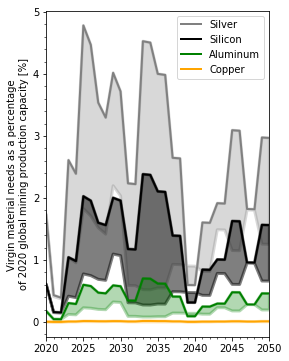

In [81]:
plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.figsize'] = (12, 8)
    
keywords=['VirginStock_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium']

fig, axs = plt.subplots(1,1, figsize=(4, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=.2)
i = 0

obj = SFscenarios[2]
# Loop over Keywords
ii = 0 
keyw = keywords[ii]
# Loop over SF Scenarios

# ROW 2, Aluminum and Silicon:        g-  4 aluminum k - 1 silicon   orange - 3 copper  gray - 2 silver
axs.plot(USyearly[keyw+materials[2]+'_USA_'+SFscenarios[2]+'_[Tonnes]']*100/mining2020_silver, 
         color = 'gray', linewidth=2.0, label='Silver')
axs.fill_between(USyearly.index, USyearly[keyw+materials[2]+'_USA_'+SFscenarios[0]+'_[Tonnes]']*100/mining2020_silver, 
                                 USyearly[keyw+materials[2]+'_USA_'+SFscenarios[2]+'_[Tonnes]']*100/mining2020_silver,
                   color='gray', lw=3, alpha=.3)
    
axs.plot(USyearly[keyw+materials[1]+'_USA_'+SFscenarios[2]+'_[Tonnes]']*100/mining2020_silicon, 
         color = 'k', linewidth=2.0, label='Silicon')
axs.fill_between(USyearly.index, USyearly[keyw+materials[1]+'_USA_'+SFscenarios[0]+'_[Tonnes]']*100/mining2020_silicon, 
                                USyearly[keyw+materials[1]+'_USA_'+SFscenarios[2]+'_[Tonnes]']*100/mining2020_silicon,
                   color='k', lw=3, alpha=.5)

axs.plot(USyearly[keyw+materials[4]+'_USA_'+SFscenarios[2]+'_[Tonnes]']*100/mining2020_aluminum, 
         color = 'g', linewidth=2.0, label='Aluminum')

axs.fill_between(USyearly.index, USyearly[keyw+materials[4]+'_USA_'+SFscenarios[0]+'_[Tonnes]']*100/mining2020_aluminum, 
                                USyearly[keyw+materials[4]+'_USA_'+SFscenarios[2]+'_[Tonnes]']*100/mining2020_aluminum,
                   color='g', lw=3, alpha=.3)


axs.plot(USyearly[keyw+materials[3]+'_USA_'+SFscenarios[2]+'_[Tonnes]']*100/mining2020_copper, 
         color = 'orange', linewidth=2.0, label='Copper')

axs.fill_between(USyearly.index, USyearly[keyw+materials[3]+'_USA_'+SFscenarios[0]+'_[Tonnes]']*100/mining2020_copper, 
                                USyearly[keyw+materials[3]+'_USA_'+SFscenarios[2]+'_[Tonnes]']*100/mining2020_copper,
                   color='orange', lw=3, alpha=.3)

axs.set_xlim([2020,2050])
axs.legend()
#axs.set_yscale('log')
axs.minorticks_on()

axs.set_ylabel('Virgin material needs as a percentage \nof 2020 global mining production capacity [%]')

fig.savefig(title_Method+' Fig_1x1_MaterialNeeds Ratio to Production.png',  bbox_inches = "tight", dpi=600)

plt.show()

In [83]:
keyw='VirginStock_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium']

newdf = pd.DataFrame()


newdf['Silver_Ref'] = USyearly[keyw+materials[2]+'_USA_'+SFscenarios[0]+'_[Tonnes]']*100/mining2020_silver
newdf['Silver_High'] = USyearly[keyw+materials[2]+'_USA_'+SFscenarios[2]+'_[Tonnes]']*100/mining2020_silver
                  
    
    
newdf['Silicon_Ref'] = USyearly[keyw+materials[1]+'_USA_'+SFscenarios[0]+'_[Tonnes]']*100/mining2020_silicon
newdf['Silicon_High'] = USyearly[keyw+materials[1]+'_USA_'+SFscenarios[2]+'_[Tonnes]']*100/mining2020_silicon 
                  
    
newdf['Aluminium_Ref'] = USyearly[keyw+materials[4]+'_USA_'+SFscenarios[0]+'_[Tonnes]']*100/mining2020_aluminum
newdf['Aluminum_High'] = USyearly[keyw+materials[4]+'_USA_'+SFscenarios[2]+'_[Tonnes]']*100/mining2020_aluminum
                         
newdf['Copper_Ref'] = USyearly[keyw+materials[3]+'_USA_'+SFscenarios[0]+'_[Tonnes]']*100/mining2020_copper
newdf['Copper_High'] = USyearly[keyw+materials[3]+'_USA_'+SFscenarios[2]+'_[Tonnes]']*100/mining2020_copper

                        
newdf['Copper_Ref'] = USyearly[keyw+materials[3]+'_USA_'+SFscenarios[0]+'_[Tonnes]']*100/mining2020_copper
newdf['Copper_High'] = USyearly[keyw+materials[3]+'_USA_'+SFscenarios[2]+'_[Tonnes]']*100/mining2020_copper

newdf.to_csv(title_Method+' Demand as Percentage of Mining.csv')



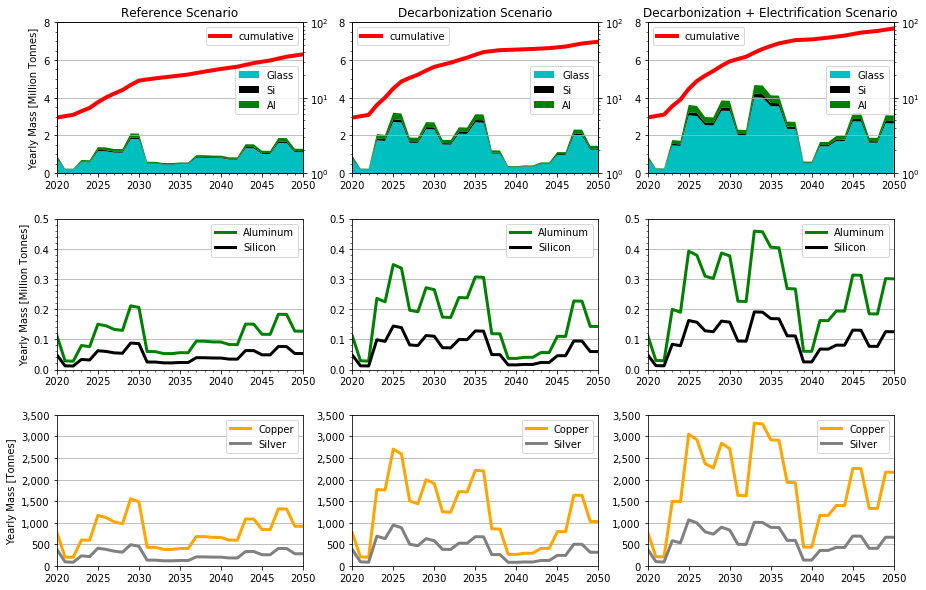

In [85]:
# FIGURE 4

import matplotlib as mpl

plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.figsize'] = (12, 8)
    
keywords=['VirginStock_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium']

fig, axs = plt.subplots(3,3, figsize=(15, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=.2)
axs = axs.ravel()
i = 0

# Loop over Keywords
ii = 0 
keyw = keywords[ii]
# Loop over SF Scenarios

titlesscens = ['Reference Scenario', 'Decarbonization Scenario', 'Decarbonization + Electrification Scenario']


for kk in range(0, 3):

    obj = SFscenarios[kk]
    axs[i].yaxis.grid()
    axs[i].axvspan(2000, 2018, facecolor='c', alpha=0.5)
#    axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
 #   axs[i].plot([],[],color='c', label='glass', linewidth=5)
 #   axs[i].plot([],[],color='k', label='silicon', linewidth=5)
 #   axs[i].plot([],[],color='m', label='silver', linewidth=5)
 #   axs[i].plot([],[],color='r', label='copper', linewidth=5)
 #   axs[i].plot([],[],color='g', label='aluminum', linewidth=5)

    axs[i].stackplot(rr.scenario[obj].data['year'], USyearly[keyw+materials[0]+'_USA_'+obj+'_[Tonnes]']/1e6, 
                                                      USyearly[keyw+materials[1]+'_USA_'+obj+'_[Tonnes]']/1e6,
                                                      USyearly[keyw+materials[4]+'_USA_'+obj+'_[Tonnes]']/1e6,
                                                      colors=['c','k','g'], labels=['Glass','Si','Al'])
    #USyearly[keyw+materials[2]+'_'+obj]/1e6, 
    #USyearly[keyw+materials[3]+'_'+obj]/1e6,
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2020, 2050])
    axs[i].set_title(titlesscens[kk])
    axs[i].legend(loc='center right',bbox_to_anchor=(1,0.55))

    #axs[i].legend(materials)

    i += 1 

# 2nd axis plot
i = 0
for kk in range(0, 3):

    obj = SFscenarios[kk]
    ax2=axs[i].twinx()
    
    module = (UScum[keyw+materials[0]+'_USA_'+obj+'_[Tonnes]']/1e6 + 
             UScum[keyw+materials[1]+'_USA_'+obj+'_[Tonnes]']/1e6 + 
             UScum[keyw+materials[2]+'_USA_'+obj+'_[Tonnes]']/1e6 +
             UScum[keyw+materials[3]+'_USA_'+obj+'_[Tonnes]']/1e6 +
             UScum[keyw+materials[4]+'_USA_'+obj+'_[Tonnes]']/1e6)
    ax2.plot(rr.scenario[obj].data['year'], module, 
             color = 'r', linewidth=4.0, label='cumulative')
    #axs[i].ylabel('Mass [Tons]')
 #   axs[i].set_xlim([2010, 2050])
  #  axs[i].set_title(keyw+ ' Yearly ' + obj.name)
    #axs[i].legend(materials)
    ax2.set_yscale('log')
#    ax2.set_ylim([1e3/1e6, 1e8/1e6])
    ax2.set_ylim([1e0, 1e2])

    i += 1 

    ax2.legend()


i = 3
# ROW 2, Aluminum and Silicon:
# Loop over SF Scenarios
for kk in range(0, 3):


    obj = SFscenarios[kk]
    axs[i].yaxis.grid()
#    axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)

    axs[i].plot(rr.scenario[obj].data['year'], USyearly[keyw+materials[4]+'_USA_'+obj+'_[Tonnes]']/1e6, color='g', lw=3, label='Aluminum')
 #   axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[4]+'_'+obj.name], 
 #                   color='g', lw=3, alpha=.6)
    
    axs[i].plot(rr.scenario[obj].data['year'], USyearly[keyw+materials[1]+'_USA_'+obj+'_[Tonnes]']/1e6, color='k', lw=3, label='Silicon')
   # axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[1]+'_'+obj.name], 
   #                 color='k', lw=3)# alpha=.3)


    # silicon aluminum 'k ''g'
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2020, 2050])
    #axs[i].set_title(keyw+ ' Yearly ' + obj.name)
    #axs[i].legend(materials)
    axs[i].legend()

    i += 1 



# ROW 3:
# Loop over SF Scenarios
for kk in range(0, 3):

    obj = SFscenarios[kk]
    axs[i].yaxis.grid()

    axs[i].plot(rr.scenario[obj].data['year'], USyearly[keyw+materials[3]+'_USA_'+obj+'_[Tonnes]'], color='orange', lw=3, label='Copper')
 #   axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[3]+'_'+obj.name], 
  #                  color='orange', lw=3)# alpha=.3)

    axs[i].plot(rr.scenario[obj].data['year'], USyearly[keyw+materials[2]+'_USA_'+obj+'_[Tonnes]'], color='gray', lw=3, label='Silver')
 #   axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[2]+'_'+obj.name], 
 #                   color='gray', lw=3)# , alpha=.6)
    
    
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2020, 2050])
    #axs[i].set_title(keyw+ ' Yearly ' + obj.name)
    axs[i].legend()
    axs[i].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

    i += 1 
    
for i in range (0, 3):
    axs[i].set_ylim([0, 0.8e7/1e6])
    axs[i].minorticks_on()

    #a0.tick_params(axis='y', which='minor', bottom=False)
    #    axs[i].set_ylim([0, 1e7/1e6])
    
    axs[i+3].set_ylim([0, 0.5e6/1e6])
    axs[i+3].minorticks_on()

    axs[i+6].set_ylim([0, 3500])

    #axs[i+3].set_ylim([1e0, 10e8])
    #axs[i+6].set_ylim([1e0, 5e6])

#    axs[i+3].set_yscale('log')
#    axs[i+6].set_yscale('log')

axs[0].set_ylabel('Mass [Tons]')
axs[3].set_ylabel('Mass [Tons]')
#axs[5].legend(materials)
    
axs[0].set_ylabel('Yearly Mass [Million Tonnes]')
axs[3].set_ylabel('Yearly Mass [Million Tonnes]')
axs[6].set_ylabel('Yearly Mass [Tonnes]')

#axs[8].legend(materials)

fig.savefig(title_Method+' SF Figure 4 - MaterialNeeds Nation.png', dpi=600)
plt.show()

In [86]:
keyword='Cumulative_Area_disposed'

USyearly_Areadisp=pd.DataFrame()

# Loop over SF Scenarios
for kk in range(0, 3):
    obj = SFscenarios[kk]
    # Loop over Materials
    foo = rr.scenario[obj].data[keyword].copy()
    USyearly_Areadisp["Areadisp_"+obj] = foo

    # Loop over STATEs
    #for jj in range (1, len(STATEs)): 
     #   USyearly_Areadisp["Areadisp_"+obj] += rr.scenario[obj].data[keyword]



In [88]:
UScum_Areadisp = USyearly_Areadisp.copy()
UScum_Areadisp = UScum_Areadisp.cumsum()

In [90]:
A = UScum['WasteAll_Module_USA_Reference.Mod_[Tonnes]'].iloc[-1]
#47700000 # tonnes cumulative by 2050
A = A*1000 # convert to kg
A = A/10.05599 # convert to m2 if each m2 is ~avg 10 kg
#A = A*2 # convert to area if each module is ~2 m2
A = A/1e6 # Convert to km 2
print(A)

866.7206834996188


In [93]:
B = UScum['WasteAll_Module_USA_95-by-35_Elec.Adv_DR_[Tonnes]'].iloc[-1]
#47700000 # tonnes cumulative by 2050
B = B*1000 # convert to kg
B= B/10.05599 # convert to m2 if each m2 is ~avg 10 kg
#A = A*2 # convert to area if each module is ~2 m2
B =B/1e6 # Convert to km 2
print(B)

1125.7863376263997


In [91]:
C = UScum_Areadisp['Areadisp_Reference.Mod'].iloc[-1]/1e6
D = UScum_Areadisp['Areadisp_95-by-35_Elec.Adv_DR'].iloc[-1]/1e6

In [94]:
# MANHATTAN SIZE:
manhattans = 59.103529

In [95]:
print("Reference Cumulative Area by 2050 of Waste PV Modules EoL", round(C), " km^2")
print("High Electrification Cumulative Area by 2050 of Waste PV Modules EoL", round(D), " km^2")


print("")
print("Reference Waste equals ", round(C/manhattans), " Manhattans ")
print("High Electrification equals ", round(D/manhattans), " Manhattans ")

print("")
print ("MFG SCrap + Eol Waste")
print("Reference Cumulative Area by 2050 of Waste PV Mfg + Modules EoL", round(A), " km^2")
print("High Electrification Cumulative Area by 2050 of Waste PV Mfg + Modules EoL", round(B), " km^$")

Reference Cumulative Area by 2050 of Waste PV Modules EoL 584.0  km^2
High Electrification Cumulative Area by 2050 of Waste PV Modules EoL 627.0  km^2

Reference Waste equals  10.0  Manhattans 
High Electrification equals  11.0  Manhattans 

MFG SCrap + Eol Waste
Reference Cumulative Area by 2050 of Waste PV Mfg + Modules EoL 867.0  km^2
High Electrification Cumulative Area by 2050 of Waste PV Mfg + Modules EoL 1126.0  km^$


### New Section

VirginStock_aluminum_Reference.Mod
VirginStock_aluminum_95-by-35.Adv  
VirginStock_aluminum_95-by-35_Elec.Adv_DR 
Waste_EOL_aluminum_Reference.Mod  
Waste_EOL_aluminum_95-by-35.Adv  
Waste_EOL_aluminum_95-by-35_Elec.Adv_DR  

VirginStock_silver_Reference.Mod
VirginStock_silver_95-by-35.Adv  
VirginStock_silver_95-by-35_Elec.Adv_DR 
Waste_EOL_silver_Reference.Mod  
Waste_EOL_silver_95-by-35.Adv  
Waste_EOL_silver_95-by-35_Elec.Adv_DR  


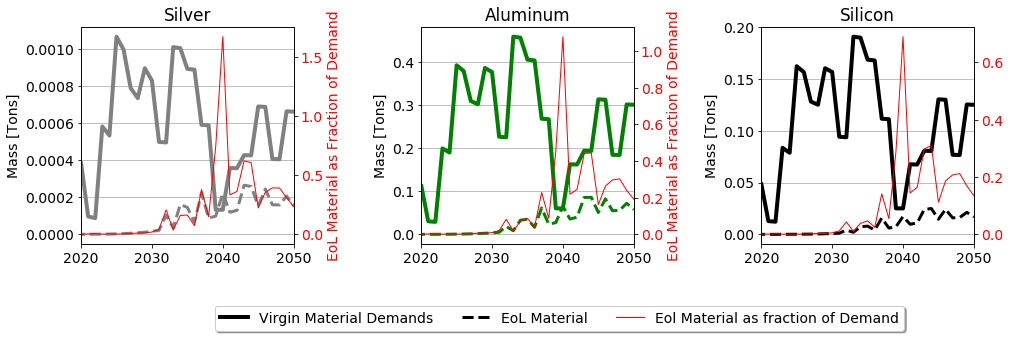

In [100]:
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = (12, 8)
    
fig, axs = plt.subplots(1,3, figsize=(16, 4), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .1, wspace=.6)
axs = axs.ravel()

# PLOT 1
i = 0
axs[i].yaxis.grid()
lns1 = axs[i].plot(USyearly.index, USyearly['VirginStock_silver_USA_95-by-35_Elec.Adv_DR_[Tonnes]']/1e6, color='gray', linewidth=4.0, label='Virgin Material Demands')
lns2 = axs[i].plot(USyearly.index, USyearly['WasteEOL_silver_USA_95-by-35_Elec.Adv_DR_[Tonnes]']/1e6, color='gray', linestyle='dashed', linewidth=3.0, label='EoL Material')
axs[i].set_ylabel('Mass [Tons]')
axs[i].set_xlim([2020, 2050])
axs[i].set_title('Silver')

# 2nd axis plot
ax2=axs[i].twinx()
lns3 = ax2.plot(USyearly.index, USyearly['WasteEOL_silver_USA_95-by-35_Elec.Adv_DR_[Tonnes]']/
                USyearly['VirginStock_silver_USA_95-by-35_Elec.Adv_DR_[Tonnes]'], 
             color = 'r', linewidth=1.0, label='Eol Material as fraction of Demand')
ax2.set_ylabel('EoL Material as Fraction of Demand', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# LEGENDS
# added these three lines
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
#axs[0].legend(lns, labs, loc=0)

# PLOT 2
i = 1
axs[i].yaxis.grid()
lns1 = axs[i].plot(USyearly.index, USyearly['VirginStock_aluminium_USA_95-by-35_Elec.Adv_DR_[Tonnes]']/1e6, color='g', linewidth=4.0, label='Virgin Material Demands')
lns2 = axs[i].plot(USyearly.index, USyearly['WasteEOL_aluminium_USA_95-by-35_Elec.Adv_DR_[Tonnes]']/1e6, color='g', linestyle='dashed', linewidth=3.0, label='EoL Material')
axs[i].set_ylabel('Mass [Tons]')
axs[i].set_xlim([2020, 2050])
axs[i].set_title('Aluminum')

# 2nd axis plot
ax2=axs[i].twinx()
lns3 = ax2.plot(USyearly.index, USyearly['WasteEOL_aluminium_USA_95-by-35_Elec.Adv_DR_[Tonnes]']/
                USyearly['VirginStock_aluminium_USA_95-by-35_Elec.Adv_DR_[Tonnes]'], 
             color = 'r', linewidth=1.0, label='Eol Material as fraction of Demand')

ax2.set_ylabel('EoL Material as Fraction of Demand', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# LEGENDS
# added these three lines
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
#axs[1].legend(lns, labs, loc=0)



# PLOT 3
i = 2
axs[i].yaxis.grid()
lns1 = axs[i].plot(USyearly.index, USyearly['VirginStock_silicon_USA_95-by-35_Elec.Adv_DR_[Tonnes]']/1e6, color='k', linewidth=4.0, label='Virgin Material Demands')
lns2 = axs[i].plot(USyearly.index, USyearly['WasteEOL_silicon_USA_95-by-35_Elec.Adv_DR_[Tonnes]']/1e6, color='k', linestyle='dashed', linewidth=3.0, label='EoL Material')
axs[i].set_ylabel('Mass [Tons]')
axs[i].set_xlim([2020, 2050])
axs[i].set_title('Silicon')

# 2nd axis plot
ax2=axs[i].twinx()
lns3 = ax2.plot(USyearly.index, USyearly['WasteEOL_silicon_USA_95-by-35_Elec.Adv_DR_[Tonnes]']/
                USyearly['VirginStock_silicon_USA_95-by-35_Elec.Adv_DR_[Tonnes]'], 
             color = 'r', linewidth=1.0, label='Eol Material as fraction of Demand')

#ax2.set_ylabel('EoL Material as Fraction of Demand', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# LEGENDS
# added these three lines
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
axs[2].legend(lns, labs, loc='upper center', bbox_to_anchor=(-0.95, -0.25),
          fancybox=True, shadow=True, ncol=5)

fig.savefig(title_Method+' Fig_1x3_VirginvsWaste_Fraction_Nation.png', bbox_inches = "tight", dpi=600)

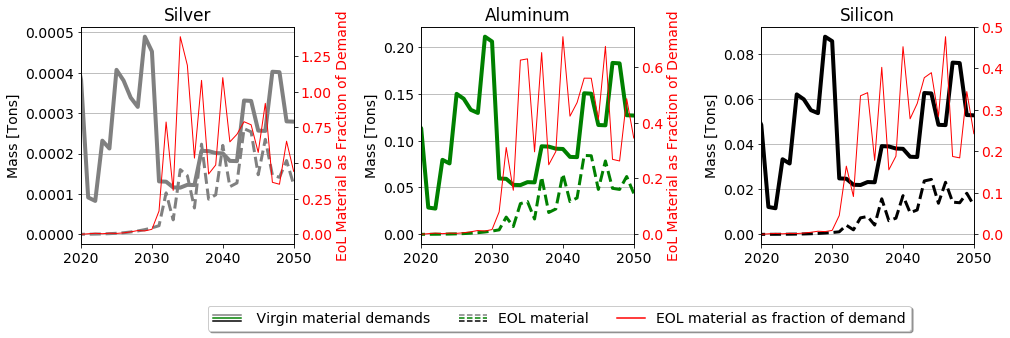

In [103]:
from matplotlib.legend_handler import HandlerBase

plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = (12, 8)

class AnyObjectHandler(HandlerBase):
    def create_artists(self, legend, orig_handle,
                       x0, y0, width, height, fontsize, trans):
        
        if orig_handle[0] is 'r':
            l1 = plt.Line2D([x0,y0+width], [0.4*height,0.4*height], color=orig_handle[0])
            return [l1]

        else:

            l1 = plt.Line2D([x0,y0+width], [0.7*height,0.7*height], color=orig_handle[0], linestyle = orig_handle[3],)
            l2 = plt.Line2D([x0,y0+width], [0.4*height,0.4*height], color=orig_handle[1], linestyle = orig_handle[4])
            l3 = plt.Line2D([x0,y0+width], [0.1*height,0.1*height], color=orig_handle[2], linestyle = orig_handle[5])
        
        return [l1, l2, l3]

    
    
fig, axs = plt.subplots(1,3, figsize=(16, 4), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .1, wspace=.6)
axs = axs.ravel()

# PLOT 1
i = 0
axs[i].yaxis.grid()
lns1 = axs[i].plot(USyearly.index, USyearly['VirginStock_silver_USA_Reference.Mod_[Tonnes]']/1e6, color='gray', linewidth=4.0, label='Virgin Material Demands')
lns2 = axs[i].plot(USyearly.index, USyearly['WasteEOL_silver_USA_Reference.Mod_[Tonnes]']/1e6, color='gray', linestyle='dashed', linewidth=3.0, label='EoL Material')
axs[i].set_ylabel('Mass [Tons]')
axs[i].set_xlim([2020, 2050])
axs[i].set_title('Silver')

# 2nd axis plot
ax2=axs[i].twinx()
lns3 = ax2.plot(USyearly.index, USyearly['WasteEOL_silver_USA_Reference.Mod_[Tonnes]']/
                USyearly['VirginStock_silver_USA_Reference.Mod_[Tonnes]'], 
             color = 'r', linewidth=1.0, label='Eol Material as fraction of Demand')
ax2.set_ylabel('EoL Material as Fraction of Demand', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# LEGENDS
# added these three lines
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
#axs[0].legend(lns, labs, loc=0)

# PLOT 2
i = 1
axs[i].yaxis.grid()
lns1 = axs[i].plot(USyearly.index, USyearly['VirginStock_aluminium_USA_Reference.Mod_[Tonnes]']/1e6, color='g', linewidth=4.0, label='Virgin Material Demands')
lns2 = axs[i].plot(USyearly.index, USyearly['WasteEOL_aluminium_USA_Reference.Mod_[Tonnes]']/1e6, color='g', linestyle='dashed', linewidth=3.0, label='EoL Material')
axs[i].set_ylabel('Mass [Tons]')
axs[i].set_xlim([2020, 2050])
axs[i].set_title('Aluminum')

# 2nd axis plot
ax2=axs[i].twinx()
lns3 = ax2.plot(USyearly.index, USyearly['WasteEOL_aluminium_USA_Reference.Mod_[Tonnes]']/
                USyearly['VirginStock_aluminium_USA_Reference.Mod_[Tonnes]'], 
             color = 'r', linewidth=1.0, label='Eol Material as fraction of Demand')

ax2.set_ylabel('EoL Material as Fraction of Demand', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# LEGENDS
# added these three lines
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
#axs[1].legend(lns, labs, loc=0)



# PLOT 3
i = 2
axs[i].yaxis.grid()
lns1 = axs[i].plot(USyearly.index, USyearly['VirginStock_silicon_USA_Reference.Mod_[Tonnes]']/1e6, color='k', linewidth=4.0, label='Virgin Material Demands')
lns2 = axs[i].plot(USyearly.index, USyearly['WasteEOL_silicon_USA_Reference.Mod_[Tonnes]']/1e6, color='k', linestyle='dashed', linewidth=3.0, label='EoL Material')
axs[i].set_ylabel('Mass [Tons]')
axs[i].set_xlim([2020, 2050])
axs[i].set_title('Silicon')

# 2nd axis plot
ax2=axs[i].twinx()
lns3 = ax2.plot(USyearly.index, USyearly['WasteEOL_silicon_USA_Reference.Mod_[Tonnes]']/
                USyearly['VirginStock_silicon_USA_Reference.Mod_[Tonnes]'], 
             color = 'r', linewidth=1.0, label='EOl Material as fraction of Demand')

#ax2.set_ylabel('EoL Material as Fraction of Demand', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# LEGENDS
# added these three lines
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
#axs[2].legend(lns, labs, loc='upper center', bbox_to_anchor=(-0.95, -0.25),
#          fancybox=True, shadow=True, ncol=5) 

#axs[2].legend([("gray","g","k","-","-","-"), ("gray","g","k","--","--","--"),("r","r","r","-","-","-")], ['Material Demands', "EoL Material", 'Fraction'],
#           handler_map={tuple: AnyObjectHandler()}, loc='upper center', bbox_to_anchor=(-0.95, -0.25),
#          fancybox=True, shadow=True, ncol=5)

axs[2].legend([("gray","g","k","-","-","-"), ("gray","g","k","--","--","--"),("r","r","r")], [' Virgin material demands', "EOL material", 'EOL material as fraction of demand'],
           handler_map={tuple: AnyObjectHandler()}, loc='upper center', bbox_to_anchor=(-0.95, -0.25),
          fancybox=True, shadow=True, ncol=5)

fig.savefig(title_Method+' Fig_1x3_VirginvsWaste_Fraction_Nation.png', bbox_inches = "tight", dpi=600)

In [117]:
newdf = pd.DataFrame()

newdf['Virgin material demands, Silicon, Reference'] = USyearly['VirginStock_silicon_USA_Reference.Mod_[Tonnes]']/1e6 
newdf['EOL material, Silicon, Reference'] = USyearly['WasteEOL_silicon_USA_Reference.Mod'+'_[Tonnes]']/1e6
newdf['EOL material as fraction of demand, Silicon, Reference'] = (USyearly['WasteEOL_silicon_USA_Reference.Mod_[Tonnes]']/
                                                                USyearly['VirginStock_silicon_USA_Reference.Mod_[Tonnes]'])

newdf['Virgin material demands, Silver, Reference'] = USyearly['VirginStock_silver_USA_Reference.Mod_[Tonnes]']/1e6 
newdf['EOL material, Silver, Reference'] = USyearly['WasteEOL_silver_USA_Reference.Mod_[Tonnes]']/1e6
newdf['EOL material as fraction of demand, Silver, Reference'] = (USyearly['WasteEOL_silver_USA_Reference.Mod_[Tonnes]']/
                                                    USyearly['VirginStock_silver_USA_Reference.Mod_[Tonnes]'])

newdf['Virgin material demands, Aluminum, Reference'] = USyearly['VirginStock_aluminium_USA_Reference.Mod_[Tonnes]']/1e6 
newdf['EOL material, Aluminum, Reference'] = USyearly['WasteEOL_aluminium_USA_Reference.Mod_[Tonnes]']/1e6
newdf['EOL material as fraction of demand, Aluminum, Reference'] = (USyearly['WasteEOL_aluminium_USA_Reference.Mod_[Tonnes]']/
                                                            USyearly['VirginStock_aluminium_USA_Reference.Mod_[Tonnes]'])


newdf['Virgin material demands, Silicon, Grid Decarb.'] = USyearly['VirginStock_silicon_USA_'+SFscenarios[1]+'_[Tonnes]']/1e6 
newdf['EOL material, Silicon, Grid Decarb.'] = USyearly['WasteEOL_silicon_USA_'+SFscenarios[1]+'_[Tonnes]']/1e6
newdf['EOL material as fraction of demand, Silicon, Grid Decarb.'] = (USyearly['WasteEOL_silicon_USA_'+SFscenarios[1]+'_[Tonnes]']/
                                                                    USyearly['VirginStock_silicon_USA_'+SFscenarios[1]+'_[Tonnes]'])

newdf['Virgin material demands, Silver, Grid Decarb.'] = USyearly['VirginStock_silver_USA_'+SFscenarios[1]+'_[Tonnes]']/1e6 
newdf['EOL material, Silver, Grid Decarb.'] = USyearly['WasteEOL_silver_USA_'+SFscenarios[1]+'_[Tonnes]']/1e6
newdf['EOL material as fraction of demand, Silver, Grid Decarb.'] = (USyearly['WasteEOL_silver_USA_'+
                                                        SFscenarios[1]+'_[Tonnes]']/USyearly['VirginStock_silver_USA_'+SFscenarios[1]+'_[Tonnes]'])

newdf['Virgin material demands, Aluminum, Grid Decarb.'] = USyearly['VirginStock_aluminium_USA_'+SFscenarios[1]+'_[Tonnes]']/1e6 
newdf['EOL material, Aluminum, Grid Decarb.'] = USyearly['WasteEOL_aluminium_USA_'+SFscenarios[1]+'_[Tonnes]']/1e6
newdf['EOL material as fraction of demand, Aluminum, Grid Decarb.'] = (USyearly['WasteEOL_aluminium_USA_'+SFscenarios[1]+'_[Tonnes]']/
                                                                    USyearly['VirginStock_aluminium_USA_'+SFscenarios[1]+'_[Tonnes]'])


newdf['Virgin material demands, Silicon, High Elec.'] = USyearly['VirginStock_silicon_USA_'+SFscenarios[2]+'_[Tonnes]']/1e6 
newdf['EOL material, Silicon, High Elec.'] = USyearly['WasteEOL_silicon_USA_'+SFscenarios[2]+'_[Tonnes]']/1e6
newdf['EOL material as fraction of demand, Silicon, High Elec.'] = (USyearly['WasteEOL_silicon_USA_'+SFscenarios[2]+'_[Tonnes]']/
                                                    USyearly['VirginStock_silicon_USA_'+SFscenarios[2]+'_[Tonnes]'])

newdf['Virgin material demands, Silver, High Elec.'] = USyearly['VirginStock_silver_USA_'+SFscenarios[2]+'_[Tonnes]']/1e6 
newdf['EOL material, Silver, High Elec.'] = USyearly['WasteEOL_silver_USA_'+SFscenarios[2]+'_[Tonnes]']/1e6
newdf['EOL material as fraction of demand, Silver, High Elec.'] = (USyearly['WasteEOL_silver_USA_'+SFscenarios[2]+'_[Tonnes]']/
                                                            USyearly['VirginStock_silver_USA_'+SFscenarios[2]+'_[Tonnes]'])

newdf['Virgin material demands, Aluminum, High Elec.'] = USyearly['VirginStock_aluminium_USA_'+SFscenarios[2]+'_[Tonnes]']/1e6 
newdf['EOL material, Aluminum, High Elec.'] = USyearly['WasteEOL_aluminium_USA_'+SFscenarios[2]+'_[Tonnes]']/1e6
newdf['EOL material as fraction of demand, Aluminum, High Elec.'] = (USyearly['WasteEOL_aluminium_USA_'+SFscenarios[2]+'_[Tonnes]']/
                                                                    USyearly['VirginStock_aluminium_USA_'+SFscenarios[2]+'_[Tonnes]'])

newdf.to_csv(title_Method+' Demand vs EOL Fraction NATION.csv')
